<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# Perceptron Classification

## Overview

- [Description](#Description)  
    - [Learning Algorithm](#Learning-Algorithm)
    - [Convergence](#Convergence)
    - [Multiclass Perceptron](#Multiclass-Perceptron)
- [Perceptron](#Perceptron)
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)

## Description

The **perceptron** is an algorithm for supervised learning of binary classifers. It is a type of linear classifier that makes its predictions based on a **linear predictor function** combining a set of weigths with the feature vector. The algorithm allos for online learning, in that it processes elements in the training set one at a time.

The perceptron algorithm dates back to the late 1950s; its first implementation, in custom hardware, was one of the first artificial neural networks to be produced.

In the modern sense, the perceptron is an algorithm for learning a binary classifier: a function that maps its input $x$ (a real-valued vector) to an output value $f(x)$ (a single binary value):

$$f(x) =  {\begin{cases}1&{\text{if }}w\cdot x+b>0\\0&{\text{otherwise}}\end{cases}}$$

where $w$ is a vector of real-valued weights, $w\cdot x$ is the dot product $\sum _{i=0}^{m}w_{i}x_{i}$, where $m$ is the number of inputs to the perceptron and $b$ is the bias. The bias shifts the decision boundary away from the origin and does not depend on any input value.

The value of $f(x)$ (0 or 1) is used to classify x as either a positive or a negative instance, in the case of a **binary classification** problem. If $b$ is negative, then the weighted combination of inputs must produce a positive value greater than $|b|$ in order to push the classifier neuron over the 0 threshold. Spatially, the bias alters the position (though not the orientation) of the decision boundary. The perceptron learning algorithm **does not terminate if the learning set is not linearly separable**. If the vectors are not linearly separable learning will never reach a point where all vectors are classified properly.

In the context of **neural networks**, a perceptron is an artificial neuron using the **Heaviside step function** as the activation function. The perceptron algorithm is also termed the single-layer perceptron, to distinguish it from a multilayer perceptron, which is a misnomer for a more complicated neural network. As a linear classifier, the single-layer perceptron is the simplest feedforward neural network.

Unlike other linear classification algorithms such as [logistic regression](03 Logistic Regression.ipynb), there is no need for a learning rate in the perceptron algorithm. This is because multiplying the update by any constant simply rescales the weights but never changes the sign of the prediction.

### Learning Algorithm

Below is an example of a learning algorithm for a (single-layer) perceptron. For multilayer perceptrons, where a hidden layer exists, more sophisticated algorithms such as backpropagation must be used. Alternatively, methods such as the delta rule can be used if the function is non-linear and differentiable, although the one below will work as well.

When multiple perceptrons are combined in an artificial neural network, each output neuron operates independently of all the others; thus, learning each output can be considered in isolation.

**Definitions**

- $\hat{y} = f(z)$ denotes the **output** from the perceptron for an input vector $z$
- $D = \{(x_1, y_1),...,(x_m, y_m)\}$ is the training set of $m$ samples where $x_j$ is the $n$-dimensional input vector and $y_j$ is the desired output of the perceptron for that input.
- $x_{j,i}$ is the value of the $i$th feature of the $j$th training input vector
- $w_i$ is the $i$th value in the weight vector, to be multiplied by the value of the $i$th input feature.
- $x_{j,0} = 1$ so $w_0$ is effectively a learned bias that we use instead of the bias constant $b$
- $w_i(t)$ is the weight $i$ at time $t$.

**Steps**

1. Initialize the weights and the threshold. Weights may be initialized to 0 or to a small random value.
2. For each example $j$ in our training set $D$, perform the following steps over the input $x_j$ and the desired output $y_j$  
    a. Calculate the actual output
    $$\hat{y}_j(t) = f[\mathbf{w}(t)\cdot \mathbf{x}_j] = f[w_0(t){x}_{j,0} + w_1(t){x}_{j,1} + ... + w_n(t){x}_{j,n} ]$$
    b. Update the weights for all features $0 \leq i \leq n$
    $$w_i(t+1) = w_i(t) + (y_j - \hat{y}_j(t))x_{j,i}$$
3. For offline learning, the step 2 may be repeated until the iteration error $\frac {1}{m}\sum _{j=1}^{m}|y_{j}-\hat{y}_{j}(t)|$, is less than a user-specified error threshold $\gamma$ or a predetermined number of iterations have been completed.


The algorithm updates the weights after steps 2a and 2b. These weights are immediately applied to a pair in the training set, and subsequently updated, rather than waiting until all pairs in the training set have undergone these steps.

### Convergence

The perceptron is a linear classifier, therefore it will never get to the state with all the input vectors classified correctly if the training set $D$ is not linearly separable, i.e. if the positive examples can not be separated from the negative examples by a hyperplane. In this case, no "approximate" solution will be gradually approached under the standard learning algorithm, but instead learning will fail completely. Hence, if linear separability of the training set is not known a priori, one of the training variants below should be used.

But if the training set is linearly separable, then the perceptron is guaranteed to converge, and there is an upper bound on the number of times the perceptron will adjust its weights during the training.

While the perceptron algorithm is guaranteed to converge on some solution in the case of a linearly separable training set, it may still pick any solution and problems may admit many solutions of varying quality. The *perceptron of optimal stability*, nowadays better known as the **linear support vector machine**, was designed to solve this problem.

### Multiclass Perceptron

Like most other techniques for training linear classifiers, the perceptron generalizes naturally to **multiclass classification**. Here, the input $x$ and the output $y$ are drawn from arbitrary sets. A feature representation function $f(x,y)$ maps each possible input/output pair to a finite-dimensional real-valued feature vector. As before, the feature vector is multiplied by a weight vector $w$, but now the resulting score is used to choose among many possible outputs:

$$\hat{y} = \operatorname{argmax}_{y}f(x,y)\cdot w$$

Learning again iterates over the examples, predicting an output for each, leaving the weights unchanged when the predicted output matches the target, and changing them when it does not. The update becomes:

$$w_{t+1}=w_{t}+f(x,y)-f(x,{\hat{y}})$$

This multiclass feedback formulation reduces to the original perceptron when $x$ is a real-valued vector, $y$ is chosen from $\{0,1\}$, and $f(x,y)=yx$

For certain problems, input/output representations and features can be chosen so that $\mathrm{argmax}_{y} f(x,y)\cdot w$ can be found efficiently even though $y$ is chosen from a very large or even infinite set.

In recent years, perceptron training has become popular in the field of **natural language processing** for such tasks as part-of-speech tagging and syntactic parsing.

## Perceptron

[Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) implements a perceptron for classification. Perceptron and [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) share the same underlying implementation. In fact, Perceptron() is equivalent to SGDClassifier(loss=”perceptron”, eta0=1, learning_rate=”constant”, penalty=None). 

Some features:

- It supports multi-class classification.
- It uses parameter penalty for regularization (L2, L1 and ElasticNet regularization) which helps in avoiding overfitting by penalizing weights with large magnitudes.
- It is sensitive to **feature scaling**

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>Perceptron</strong> (penalty=None, alpha=0,0001, fit_intercept=True, n_iter=5, eta0=1.0)
<br/>
Parameters:
<ul>
<li>penalty: the penalty (aka regularization term) to be used (none, l2, l1 or elasticnet)</li>
<li>alpha: constant that multiplies the regularization term if regularization is used</li>
<li>fit_intercept: whether the intercept should be estimated or not. If False, the data is assumed to be already centered</li>
<li>n_iter: The number of passes over the training data (aka epochs)</li>
<li>eta0: constant by which the updates are multiplied</li>
</ul>
</div>

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['legend.fontsize'] = 10

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [6]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler(with_mean=True, with_std=True)
sd.fit(X_train)

X_train_std = sd.transform(X_train)
X_test_std = sd.transform(X_test)

In [7]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [8]:
ppn.classes_

array([0, 1, 2])

In [9]:
ppn.coef_

array([[-0.05713219,  0.16885008, -0.04112711, -0.0184315 ],
       [ 0.00133643, -0.2811311 ,  0.07588615, -0.39259088],
       [ 0.16404623, -0.01028528,  0.78327246,  0.56953325]])

In [10]:
ppn.intercept_

array([-0.1, -0.1, -0.9])

In [11]:
ppn.loss_function

In [12]:
print('Accuracy: {0}'.format(ppn.score(X_test_std, y_test)))
y_pred = ppn.predict(X_test_std)
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.733333333333
Number of milabeled points: 12


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

In [13]:
from modules import plot_decision_regions

X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.911111111111
Number of mislabeled points: 4


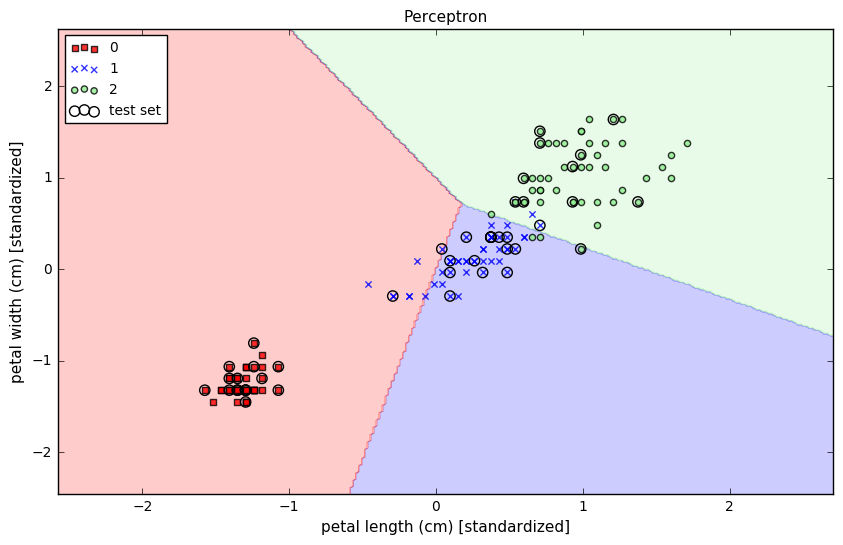

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=ppn, test_marker=True)
plt.title('Perceptron')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')

Accuracy: 0.755555555556
Number of mislabeled points: 11


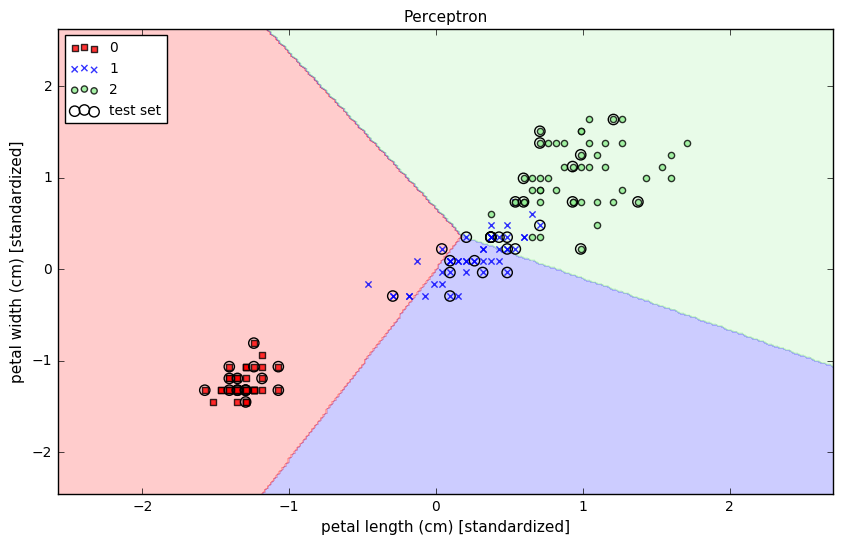

In [15]:
ppn = Perceptron(n_iter=500, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=ppn, test_marker=True)
plt.title('Perceptron')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')